Jupyter Notebook for Dataset2: Choosing best heuristic for proof

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize

import seaborn as sns


Reading in the data set

In [3]:
heuristicData = pd.read_csv('Heuristics_train.csv')

test = pd.read_csv("test.csv")

Part A

The number of samples as well as the number of attributes per sample.

In [4]:
print("The proof heuristic dataset includes %d samples." %heuristicData.shape[0])
print("There are %d attributes per sample." %heuristicData.shape[1])

The proof heuristic dataset includes 3058 samples.
There are 57 attributes per sample.


This dataset has no categorical variables. It also does not have any missing values in the dataset. 

The attributes are separated into two categories: static and dynamic. The static features were derived from the size and structure of the clauses of the theorem that the theorem prover is attempting to prove. These are all attrivutes that come from only the problem description. They include information such as information about the type and number of clauses as well as the depth ans weight of the clauses.

The dynamic features were derived from measuring the the theorem prover's progress. The theorem prover has already processed some clauses and has a set of axioms. The dynamic features were derived by running the theorem prover with heuristic 1 as default.

Histograms of different variables

I choose variables that I thought would have an impact on the final result, but did not use any other reasoning on choosing which variables to plot.

Text(0.5, 1.0, 'Histogram for Average Clause Weight')

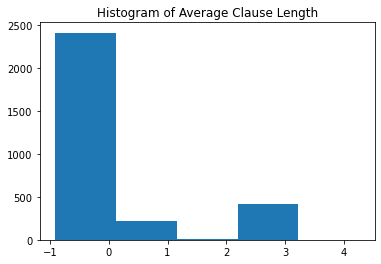

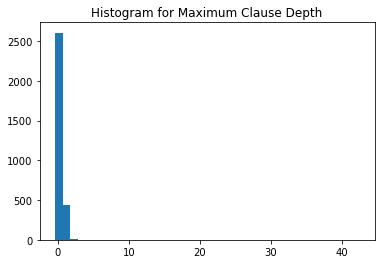

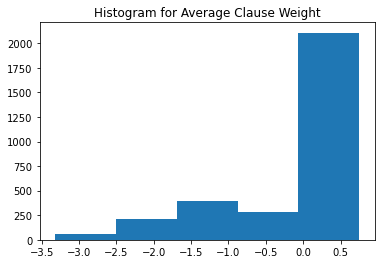

In [5]:
# col  9 is average clause length
plt.figure(1)
plt.hist(heuristicData.iloc[:,9], 5)
plt.title("Histogram of Average Clause Length")

# col 11 is the average clause depth
plt.figure(2)
plt.hist(heuristicData.iloc[:,11],40)
plt.title("Histogram for Maximum Clause Depth")

plt.figure(3)
plt.hist(heuristicData.iloc[:,13],5)
plt.title("Histogram for Average Clause Weight")

Part B

The first thing we want to do is to separate the input attributes from the output classification. After we do that, I normalized the input attributes to have a 0 mean and 1 standard deviation. 

We normalize data because the features have a very large range, as is evident through the histograms above. Normalizing gives each attribute an equal weight for machine learning models.

To standardize the data, I used the sklearn normalize function. 

In [6]:
X = heuristicData.iloc[:,0:51]
X = normalize(X)
Y = heuristicData.iloc[:,51:57]


Part C

Extract attributes to X and Outputs to Y

Separate samples into training and testing data. 

This dataset had two separate .csv files for training data and testing data.

To process each I read in the data, separated into input attributs and the output, and normalized each.

In [7]:
x_train = X
y_train = Y
x_test = test.iloc[:,0:51]
x_test = normalize(x_test)
y_test = test.iloc[:,51:57]

Here feature extraction has already been performed to generate the Heuristics_train.csv file downloaded from the website. The researchers extracted information from the theorems themselves, as well as information after running a theorem solver on the theorems for the samples. 

Furthermore, the dataset already encoded the results into vectors with 1 if that heuristic was chosen or -1 if it was not chosen.

Part D

For the first machine learning method, I choose to do K nearest neighbors. I used cross validation to determine the optimal K for perform the k nearest neighbors classification.

KNN model for classification works by looking at the k nearest points to the sample, and does a majority vote among the closest samples to see what the output classification for the sample we are interested in should be.

Using the Kfold function from the sklearn library, I hcoose to have 5 folds, to shuffle the data, and that the indices should be randomized.

In [8]:
folds = KFold(n_splits = 5, shuffle = True, random_state=100)

hyper_params = {'n_neighbors':range(2,100)}

knn = KNeighborsClassifier()

knn_cv = GridSearchCV(knn, hyper_params, cv = folds, scoring = 'accuracy', return_train_score=True, verbose = 1)

knn_gridSearch = knn_cv.fit(x_train, y_train)

Fitting 5 folds for each of 98 candidates, totalling 490 fits


Above, I used the function GridSearchCV which performs cross validation on our estimate model with the parameters we choose. In this case, it performed cross validation on the KNN model with a range of 2 to 100 nearest neighbors.

This prints the results from the grid search cross validation for KNN with the number of neighbors ranging from 2 to 100 neighbors.

In [9]:
knn_results = pd.DataFrame(knn_cv.cv_results_)
knn_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004390,0.000491,0.141429,0.006457,2,{'n_neighbors': 2},0.351307,0.316993,0.343137,0.306056,...,0.331911,0.017299,19,0.517580,0.525348,0.517580,0.523089,0.516551,0.520029,0.003514
1,0.003989,0.000619,0.152774,0.006421,3,{'n_neighbors': 3},0.450980,0.457516,0.465686,0.448445,...,0.456833,0.006412,1,0.639002,0.650041,0.637776,0.655088,0.646915,0.645764,0.006574
2,0.003390,0.000488,0.141822,0.006338,4,{'n_neighbors': 4},0.354575,0.352941,0.357843,0.333879,...,0.351861,0.009327,10,0.468111,0.460343,0.452167,0.459747,0.458521,0.459778,0.005085
3,0.004191,0.001464,0.146207,0.002580,5,{'n_neighbors': 5},0.424837,0.449346,0.426471,0.407529,...,0.429689,0.014305,2,0.544563,0.546607,0.528209,0.556600,0.541071,0.543410,0.009188
4,0.003390,0.000490,0.136018,0.002053,6,{'n_neighbors': 6},0.364379,0.380719,0.366013,0.348609,...,0.367230,0.011162,7,0.443173,0.438267,0.420687,0.442174,0.436044,0.436069,0.008114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0.003979,0.000018,0.147580,0.006657,95,{'n_neighbors': 95},0.233660,0.245098,0.197712,0.229133,...,0.227274,0.015799,92,0.219133,0.250613,0.237531,0.235390,0.222313,0.232996,0.011340
94,0.003203,0.000395,0.145619,0.002773,96,{'n_neighbors': 96},0.228758,0.236928,0.197712,0.224223,...,0.223351,0.013454,96,0.214636,0.246525,0.234669,0.230078,0.217818,0.228745,0.011588
95,0.003398,0.000483,0.150075,0.004249,97,{'n_neighbors': 97},0.230392,0.240196,0.197712,0.227496,...,0.225313,0.014447,94,0.215863,0.251022,0.236713,0.232530,0.219044,0.231034,0.012712
96,0.003386,0.000486,0.145616,0.002422,98,{'n_neighbors': 98},0.227124,0.233660,0.184641,0.222586,...,0.219756,0.017944,98,0.213410,0.246116,0.225675,0.229260,0.216592,0.226210,0.011508


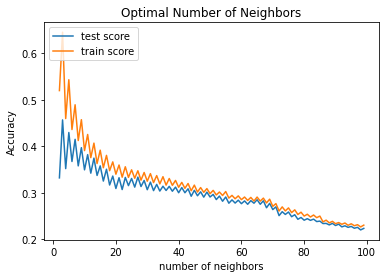

In [10]:
plt.plot(knn_results["param_n_neighbors"], knn_results["mean_test_score"])
plt.plot(knn_results["param_n_neighbors"], knn_results["mean_train_score"])
plt.xlabel('number of neighbors')
plt.ylabel('Accuracy')
plt.title("Optimal Number of Neighbors")
plt.legend(['test score', 'train score'], loc='upper left')

From this graph, we see that both the mean test score as well as the mean train score tend to decrease as the number of neighbors increases. As a result, I choose the optimal number of neighbors to be 3 neighbors.

This is the trained KNN model with 3 neighbors.

The accuracy I am referring to below is the overall accuracy of the model. It is given by the number of correct predictions divided by the number of samples.

In [11]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

accuracy = accuracy_score(y_pred, y_test)

print("The accuracy for this KNN model is {:.2f}%".format(accuracy*100))

The accuracy for this KNN model is 46.11%


Another measure of the model's performance is the confusion matrix, which is shown below. The confusion matrix tells us how many of each category were classified correctly, and how often and in what way samples were misclassified.

Text(0.5, 1.0, 'Confusion Matrix for KNN')

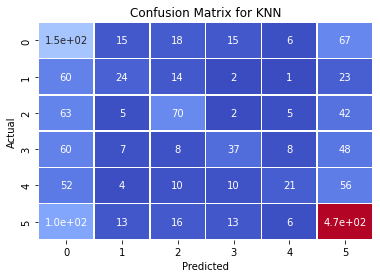

In [12]:
# multilabel_confusion_matrix(y_test.to_numpy(), y_pred)
knn_matrix = confusion_matrix(y_test.to_numpy().argmax(axis=1), y_pred.argmax(axis=1))
ax = sns.heatmap(knn_matrix, linewidth = .5,annot=True, cmap = "coolwarm", cbar = False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for KNN")


From the confusion matrix we see that most of the theorems fall under the category of too hard to prove and are classified correctly as such. Relatively speaking, there seems to be more theorems predicted to have heuristic 0 be the fastest proof method, but in reality it is one of the other heuristics or too hard to prove at all.

The next classification method I choose to implement is a decision tree. Here I used cross validation to determine what the optimal maximum depth for the tree is. 

I ran the GridSearchCV on the decision tree classfier with max depth ranging from 1 to 50 and printed out the results of the gridsearch below.

In [13]:
folds = KFold(n_splits = 5, shuffle = True, random_state=100)

tree_model = DecisionTreeClassifier()
parameters = {'max_depth': range(1,50)}
tree_cv = GridSearchCV(tree_model, param_grid=parameters, scoring = 'accuracy', cv = folds, verbose = 1, return_train_score = True) 
tree_gridSearch = tree_cv.fit(x_train, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


In [14]:
tree_results = pd.DataFrame(tree_cv.cv_results_)
tree_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.028757,0.006370,0.001394,0.000493,1,{'max_depth': 1},0.093137,0.109477,0.088235,0.101473,...,0.102032,0.010725,48,0.105070,0.100572,0.105887,0.102166,0.098079,0.102355,0.002875
1,0.042894,0.000588,0.001599,0.000486,2,{'max_depth': 2},0.093137,0.106209,0.088235,0.099836,...,0.095160,0.006957,49,0.103434,0.099755,0.105887,0.100940,0.082959,0.098595,0.008099
2,0.060650,0.000410,0.001987,0.000015,3,{'max_depth': 3},0.142157,0.106209,0.101307,0.130933,...,0.125908,0.019041,47,0.139820,0.101390,0.121423,0.140172,0.135268,0.127614,0.014774
3,0.078796,0.000636,0.001594,0.000488,4,{'max_depth': 4},0.183007,0.230392,0.205882,0.137480,...,0.202416,0.040465,46,0.206868,0.245298,0.239166,0.165509,0.246833,0.220735,0.031197
4,0.097127,0.001887,0.001783,0.000393,5,{'max_depth': 5},0.217320,0.236928,0.197712,0.252046,...,0.234484,0.024949,45,0.286182,0.264922,0.228128,0.305272,0.266449,0.270190,0.025681
5,0.112112,0.000505,0.001996,0.000001,6,{'max_depth': 6},0.228758,0.292484,0.312092,0.240589,...,0.283524,0.043267,44,0.305805,0.331153,0.347097,0.308132,0.376788,0.333795,0.026360
6,0.129060,0.002157,0.001792,0.000398,7,{'max_depth': 7},0.251634,0.401961,0.333333,0.248773,...,0.313261,0.057494,43,0.339738,0.455846,0.390433,0.329383,0.396812,0.382443,0.045382
7,0.142254,0.001866,0.001983,0.000017,8,{'max_depth': 8},0.285948,0.369281,0.392157,0.297872,...,0.344011,0.043369,42,0.411693,0.481194,0.477105,0.395995,0.480180,0.449233,0.037416
8,0.155981,0.001186,0.001788,0.000396,9,{'max_depth': 9},0.302288,0.370915,0.406863,0.345336,...,0.364622,0.037884,41,0.461979,0.531480,0.563369,0.486718,0.554148,0.519539,0.039120
9,0.170954,0.002887,0.001605,0.000494,10,{'max_depth': 10},0.372549,0.398693,0.413399,0.369885,...,0.396994,0.023337,40,0.554783,0.615290,0.607931,0.560687,0.631385,0.594015,0.030636


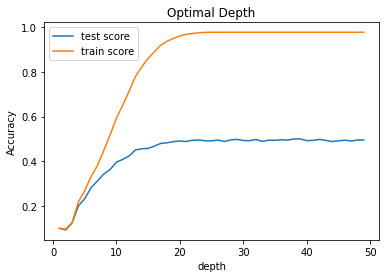

In [15]:
plt.plot(tree_results["param_max_depth"], tree_results["mean_test_score"])
plt.plot(tree_results["param_max_depth"], tree_results["mean_train_score"])
plt.xlabel('depth')
plt.ylabel('Accuracy')
plt.title("Optimal Depth")
plt.legend(['test score', 'train score'], loc='upper left')

The plot of the accuracy vs the maximum depth for cross validation of the decision tree classifier plateaus at a depth of around 25. This tells us the approximate optimal depth that we should use to train the decision tree classifier.

Here we train a model t with a decison tree classifier with the optimal depth of 25 which we determined previously. We also determine the accuracy of the model by comparint the y_test data to the predicted outcomes from the model.

In [16]:
t = DecisionTreeClassifier(max_depth=25)
t.fit(x_train, y_train)
y_pred = t.predict(x_test)

accuracyT = accuracy_score(y_pred, y_test)
print("The accuracy for this tree model is {:.2f}%".format(accuracyT*100))


The accuracy for this tree model is 49.12%


Here we plot the confusion matrix for the decision tree classifier as well. 

Text(0.5, 1.0, 'Confusion Matrix for Decision Tree')

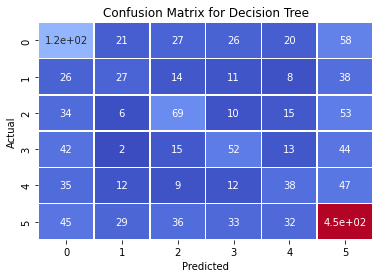

In [17]:
tree_matrix = confusion_matrix(y_test.to_numpy().argmax(axis=1), y_pred.argmax(axis=1))
ax = sns.heatmap(tree_matrix, linewidth = .5,annot=True, cmap = "coolwarm", cbar = False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Decision Tree")



The Decision Tree Classifier has very similar results in the confusion matrix to that of KNN. Here most samples are classified correctly as being to complex to prove in a timely manner. The heuristics with the most misclassified samples are firstly misclassified as heuristic 0 and then misclassified as being too complex to prove in a timely manner.

Side by side comparison of confusion matrices for KNN and Decision Tree Models

Text(0.5, 1.0, 'Confusion Matrix for Decision Tree')

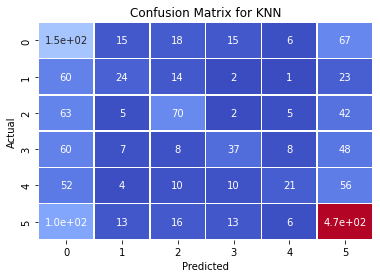

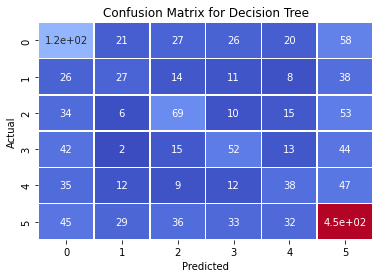

In [18]:
plt.figure(1)
ax = sns.heatmap(knn_matrix,linewidth = .5,annot=True, cmap = "coolwarm", cbar = False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for KNN")

plt.figure(2)

ax = sns.heatmap(tree_matrix,linewidth = .5,annot=True, cmap = "coolwarm", cbar = False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Decision Tree")

The following uses the values from each confusion matrix to calculate the accuracy per class for each classification model.

In [19]:
print("These are the accuracies per class for the decision tree model:")
print(tree_matrix.diagonal()/tree_matrix.sum(axis=1))

print("These are the accuracies per class for the KNN model:")
print(knn_matrix.diagonal()/knn_matrix.sum(axis=1))

These are the accuracies per class for the decision tree model:
[0.44322344 0.21774194 0.36898396 0.30952381 0.24836601 0.71955128]
These are the accuracies per class for the KNN model:
[0.55677656 0.19354839 0.37433155 0.2202381  0.1372549  0.75480769]


With both KNN and Decision trees, most samples are classified as too hard to predict correctly. In both cases, the most common error is to misclassify the sample as having heuristic 1 being the method to get the fastest proof, followed by being misclassified as being too complicated to prove.

In terms of complexity, KNN had optimal results when looking at the 3 nearest neighbors, which is relatively low complexity in comparison to the decision tree which needed a maximum depth of 36 Although the decision tree had a larger accuracy percentage of 49% in comparision to 46% for KNN, they are very close in terms of overall accuracy.

However, looking at accuracy per class, we see that KNN is not as accurate to predict when heuristic 5 should be used for the fastest proof. Therefore depending on emphasis is placed on individual class accuracy or overall model accuracy, each model may have differing strengths.

Overall however, KNN has a lower complexity but is less accurate than Decision Tree method.

Since the two models are very close in terms of accuracy, I would recommend KNN for this dataset due to the lower complexity and comparible final results.